In [27]:
using Revise    
include("../../src/pure/Pnjl_pure.jl")
using Plots
using DataFrames, CSV
using Peaks
using BenchmarkTools

In [14]:
using Revise
include("../../src/pure/Rep.jl")

using Plots, LaTeXStrings

In [9]:

Lambda_T = 70/hc
ints = get_nodes(200 ;nodes2=200)
X0 = [-0.01, -0.01, -0.2, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
Ts = 300.0:-1.00:150
mu_B = 0.0
Ss = zeros(length(Ts))
etas = zeros(length(Ts))
for (j, T) in enumerate(Ts)
    println("T = $T MeV")
    X0 = Tmu(T/hc, mu_B/hc, X0, ints)
    etas[j] = trans_eff(X0, T/hc, mu_B/hc, ints)[3]
    Ss[j] = DTOmega(1.001 * X0, T/hc, mu_B/hc, ints)
end


T = 300.0 MeV


MethodError: Error trying to display an error.

Trho (generic function with 1 method)

In [13]:
eta_s = etas ./ Ss 

# 计算 1/(4π) 的值
kss_bound = 1 / (4 * π)

p = plot(Ts, eta_s, 
         xlabel=L"T \, (\mathrm{MeV})", 
         ylabel=L"\eta/s",
         lw=2, 
         label=L"\eta/s",
         framestyle=:box,
         grid=true,
         minorticks=2)

# 添加 KSS 界限线
hline!([kss_bound], 
       lw=2, 
       linestyle=:dash, 
       color=:red,
       label=L"1/(4\pi) \, (\mathrm{KSS \, bound})")

display(p)

LoadError: LoadError: UndefVarError: `@L_str` not defined in `Main`
Suggestion: check for spelling errors or missing imports.
Hint: a global variable of this name also exists in LaTeXStrings.
in expression starting at /home/rotor/CodeFile/Julia/PNJLs/Test/pure/jl_notebook_cell_df34fa98e69747e1a8f8a730347b8e2f_W3sdnNjb2RlLXJlbW90ZQ==.jl:7

In [49]:
include("../../src/pure/Pnjl_pure.jl")
using Plots, LaTeXStrings

In [48]:



X0 = [-0.01, -0.01, -0.42, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
p1, w1 = gauleg(0.0, Lambda_f, 128)
w1 = w1 .* p1.^2 ./ (2*pi^2)
println(Lambda_f)
nodes2 = 59
ints1 =  (p1, w1)
ints = (ints1, nodes2)
T = 400.0
mu_B = 0.0

P = -Omega(X0[1:3], X0[4], X0[5], T/hc, mu_B/hc, ints)


3.0522475041808135


86.06255082963195

In [59]:



X0 = [+0.01, +0.01, +0.42, 0.8, 0.8]  # phi_u, phi_d, phi_s, Phi1, Phi2
p1, w1 = gauleg(0.0, Lambda_f, 128)
w1 = w1 .* p1.^2 ./ (2*pi^2)
println(Lambda_f)
nodes2 = 128
ints1 =  (p1, w1)
ints = (ints1, nodes2)
Ts = 300.0:-10.0:150.0
mu_B = 0.0
for T in Ts
    println("T = $T MeV")
    X0 = Tmu(T/hc, mu_B/hc, X0, ints)
end


3.0522475041808135
T = 300.0 MeV
T = 290.0 MeV
T = 280.0 MeV
T = 270.0 MeV
T = 260.0 MeV
T = 250.0 MeV
T = 240.0 MeV
T = 230.0 MeV
T = 220.0 MeV
T = 210.0 MeV
T = 200.0 MeV
T = 190.0 MeV
T = 180.0 MeV
T = 170.0 MeV
T = 160.0 MeV
T = 150.0 MeV


In [53]:
Ns = 10:2:128
Ps = zeros(length(Ns))
T = 600.0
mu_B = 0.0
for (i, N) in enumerate(Ns)
    ints = (ints1, N)
    Ps[i] = -Omega(X0[1:3], X0[4], X0[5], T/hc, mu_B/hc, ints)
end



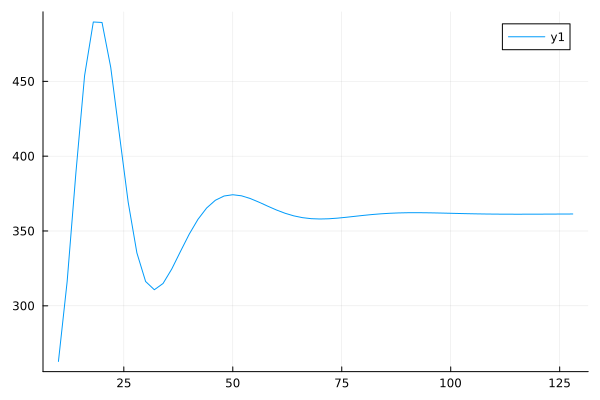

In [54]:
plot(Ns, Ps)